# Introduction  

## Titanic - Machine Learning from Disaster  

Developed by André Moreira
- [GitHub](https://github.com/moreira-and)  
- [LinkedIn](https://www.linkedin.com/in/moreira-and/)  

This project explores the iconic **Titanic - Machine Learning from Disaster** competition hosted on Kaggle. The goal is to predict passenger survival based on various features such as age, gender, and class. Through exploratory data analysis (EDA), we aim to uncover patterns and insights to guide machine learning models.

**Reference:**  
Will Cukierski. *Titanic - Machine Learning from Disaster*. Kaggle, 2012. [Competition page](https://kaggle.com/competitions/titanic).


## Required Libraries  

A data scientist should declare all necessary libraries at the beginning of the file. Whenever a new library is needed, it should be added to this section to maintain organization and readability.


In [167]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [ ]:
import sys
sys.path.append('../')

from src.functions.statistical import chi_squared_test

from src.functions.plot import plot_categorical_relationship
from src.functions.plot import plot_boxplots_with_outliers
from src.functions.plot import plot_boxplots_hist_kde
from src.functions.plot import plot_correlation_heatmap
from src.functions.plot import correlation_analysis

ImportError: cannot import name 'correlation_analysis_2var' from 'src.functions.plot' (c:\VIRTUALENVS\bootcamp_cientista_dados\kaggle_titanic\notebooks\..\src\functions\plot.py)

## Business Understanding  

### Objective  
The goal is to build a predictive model to determine which types of passengers were more likely to survive the Titanic disaster. This involves classifying passengers based on features such as age, gender, and socio-economic class.  

### Context  
The sinking of the Titanic on April 15, 1912, remains one of the most infamous maritime tragedies. Out of 2,224 passengers and crew, 1,502 perished due to insufficient lifeboats. While luck played a role, certain groups had higher survival chances. Understanding these patterns provides insights into decision-making and resource allocation in critical situations.  

### Success Criteria  
A successful project will yield:  
- A predictive model with high classification accuracy.  
- Actionable insights into survival factors.  
- Clear data-driven explanations of the key survival predictors.  


## Data Loading and Purpose

In [ ]:
# This dataframe will be used for exploratory data analysis and training the model.
df_train = pd.read_csv('../data/raw/train.csv')

# This dataframe will be used to test the machine learning model and verify if it meets the project criteria. DO NOT TRAIN WITH THIS DATA!
df_test_model = pd.read_csv('../data/raw/test.csv')

# This dataframe will be used to generate the predictions for submission in the competition.
df_test_sub = pd.read_csv('../data/raw/gender_submission.csv')

## Data Understanding  

| Variable   | Definition                                        | Key                                             |
|------------|---------------------------------------------------|-------------------------------------------------|
| survival   | Survival status                                   | 0 = No, 1 = Yes                                |
| pclass     | Ticket class                                      | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex        | Gender                                            |                                                 |
| age        | Age in years                                      |                                                 |
| sibsp      | Number of siblings / spouses aboard the Titanic   |                                                 |
| parch      | Number of parents / children aboard the Titanic   |                                                 |
| ticket     | Ticket number                                     |                                                 |
| fare       | Passenger fare                                    |                                                 |
| cabin      | Cabin number                                      |                                                 |
| embarked   | Port of Embarkation                               | C = Cherbourg, Q = Queenstown, S = Southampton  |


## EDA - Exploratory Data Analysis

In [ ]:
# Shape
df_train.shape

(891, 12)

In [ ]:
# Info 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Descriptive statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verify how the data is organized by taking 10 random samples
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


Opportunity to Verify Data Types:

- **PassengerId**: This field represents a unique identifier for each passenger, allowing additional information to be retrieved about them. However, since it is not the focus of this analysis, it will be separated for use in the output data.

- **Survived**: A categorical/boolean variable indicating the survival status of the passenger. It needs to be adapted for analysis and will be kept as output data.

- **Pclass**: A categorical variable referring to the passenger's class. This needs to be adapted and analyzed to understand its impact on survival.

- **Name**: Although it may seem informative, the name does not provide relevant causality for prediction (e.g., "The Matheus are more likely to survive"). Therefore, it should be excluded from the analysis.

- **Sex**: A categorical variable that also requires adaptation and analysis, as it may have a significant impact on survival chances.

- **Age**: A numerical variable with missing values that need to be addressed. Analyzing passengers' ages could reveal important insights about survival.

- **SibSp**: A numerical variable representing the number of siblings and spouses aboard. This field should be analyzed to determine its relevance to prediction.

- **Parch**: Similar to SibSp, this is a numerical variable indicating the number of parents and children aboard. It should be analyzed to understand its impact on survival.

- **Ticket**: A string field, similar to the Name field, which doesn't directly imply causality. However, patterns in ticket numbers might help supplement missing data in other columns.

- **Fare**: A numerical variable representing the ticket price. It is important to analyze as it could correlate with Pclass and may eventually be discarded by the model if it does not contribute to prediction.

- **Cabin**: A categorical string variable that could provide information about the passenger's location on the ship. However, it contains many missing values. If these cannot be filled through other variables like Ticket or Embarked, it should be considered for exclusion.

- **Embarked**: A categorical string variable that may offer insights into passenger habits and how this influences survival chances. Like other variables, missing data must be handled, and analysis should be conducted to understand its impact.


### Handling Missing Values

Identify missing data and decide on an imputation or removal strategy.

<Axes: >

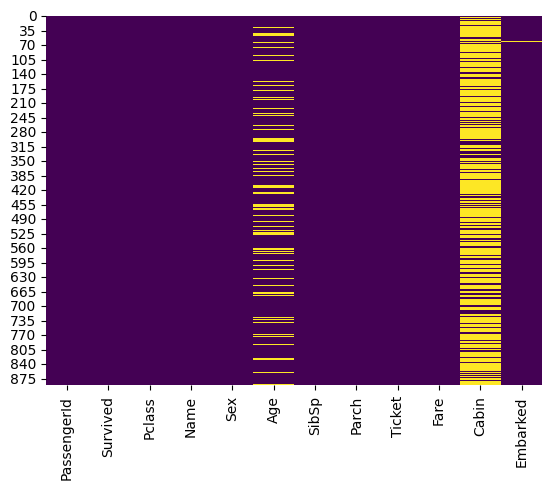

In [ ]:
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')

In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Treatment Requirements:

- **Age**: This variable has a considerable amount of missing data. It is important to analyze its distribution to determine the best approach, which could include using the median, mean, or, if necessary, removing the rows containing these missing values.

- **Cabin**: This field has a significant amount of missing data. If it is not possible to fill in these values using other columns like Ticket or Embarked, the column should be considered for removal.

- **Embarked**: With few missing values, it is necessary to determine the most appropriate information to insert. The mode of the column could be a suitable solution to fill in the missing values.


#### Can the Cabin be complemented?

In [ ]:
# - Cabin can potentially be inferred from Ticket and Embarkation?
ticket_contingency_table = pd.crosstab(df_train['Pclass'], df_train['Cabin'])
ticket_contingency_table

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Pclass,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,2,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2,0,0,1,0,4,0


In [ ]:
# If we separe the letter and number, this pass a context?
df_train[['Cabin_l','Cabin_n']] = df_train['Cabin'].str.extract(r'([A-Za-z]+)(\d+)')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_l,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [ ]:
# The cabin can be associated with a ticket and embarkation.
ticket_contingency_table = pd.crosstab(df_train['Pclass'], df_train['Cabin_l'])
ticket_contingency_table
# We only have Pclass 1 in this DataFrame, so it will be difficult to define other classes. However, could the ticket be useful?

Cabin_l,A,B,C,D,E,F,G
Pclass,,,,,,,
1,15,47,59,29,25,0,0
2,0,0,0,1,4,8,0
3,0,0,0,0,4,1,7


In [ ]:
ticket_contingency_table = pd.crosstab(df_train['Ticket'], df_train['Cabin_l'])
ticket_contingency_table
# Ticket is not useful for this modeling, and we can't use it to complement Cabin.

Cabin_l,A,B,C,D,E,F,G
Ticket,,,,,,,
110152,0,3,0,0,0,0,0
110413,0,0,0,0,3,0,0
110465,1,0,1,0,0,0,0
110564,0,0,1,0,0,0,0
110813,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
PP 9549,0,0,0,0,0,0,2
S.O./P.P. 3,0,0,0,0,1,0,0
SOTON/O.Q. 392078,0,0,0,0,1,0,0


In [ ]:
# Is there a relationship between Cabin and Survived?
contingency_table = pd.crosstab(df_train['Survived'], df_train['Cabin_l'])
contingency_table

Cabin_l,A,B,C,D,E,F,G
Survived,,,,,,,
0,8,12,24,7,8,2,5
1,7,35,35,23,25,7,2


Looking at the data, we see Cabins A, B, C, D, E, and G, but we don't have enough data to know if this is real.
Additionally, we only have this data for the first class passengers. We will make a decision to remove this data from the training DataFrame.

#### Categorical Data Analysis

Before performing the test, we need to identify which fields to use to fill the missing values in the **Embarked** variable.

In [ ]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
col = ['Sex','Pclass','Embarked']

<Figure size 1200x600 with 0 Axes>

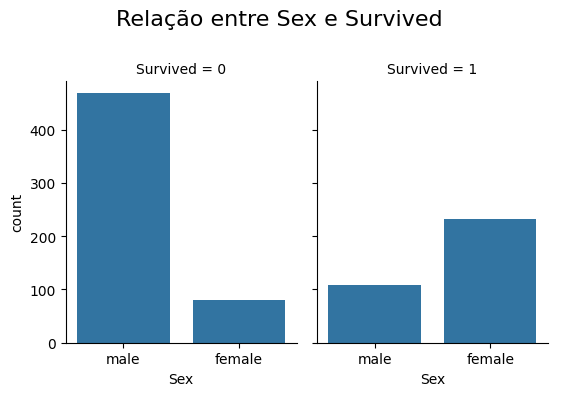

<Figure size 1200x600 with 0 Axes>

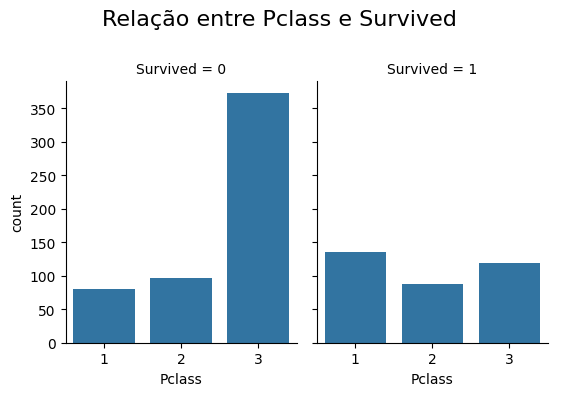

<Figure size 1200x600 with 0 Axes>

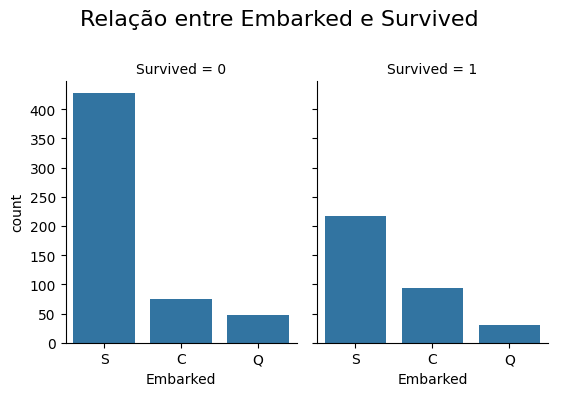

In [ ]:
for var in col:
    plot_categorical_relationship(df=df_train,cat_var1=var,cat_var2='Survived')

When analyzing survival data in relation to categorical variables, some insights can be drawn:

- **Social Class:** Social class significantly influences survival rates. First-class passengers have the highest survival probability, followed by second-class and third-class passengers.

- **Sex:** Sex also plays a significant role in survival. Female passengers have a higher survival probability than male passengers.

- **Embarkation Port:** There is a slight difference in survival rates based on the embarkation port, with Cherbourg showing the highest survival probability. However, causality remains uncertain. It would be useful to further investigate this variable and validate its impact on survival using a chi-square test.

<Figure size 1200x600 with 0 Axes>

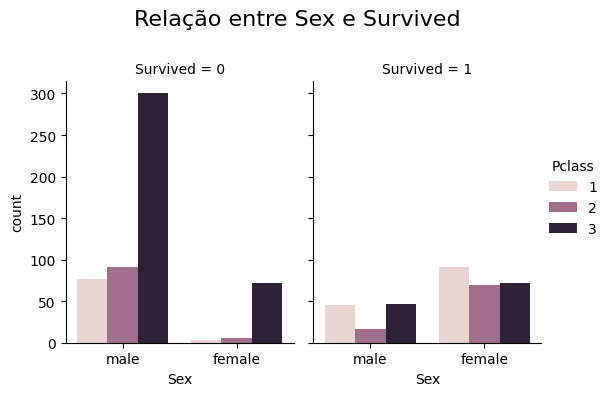

In [ ]:
# Check if class influences survival based on sex
plot_categorical_relationship(df=df_train,cat_var1='Sex',cat_var2='Survived',hue='Pclass')

In addition to gender, it was observed that social class also plays a significant role in survival probability. Passengers from the first and second classes have higher chances of survival compared to those from third class. Among those who survived, men have a lower survival probability than women, but still higher than male passengers in third class.

### Chi-Square Test

The Chi-Square test is a valuable tool for analyzing the relationship between categorical variables and the target variable.

Essentially, the null hypothesis states that the variables are statistically independent and do not influence the target variable. To test this hypothesis, the p-value is used.

If the p-value is less than 0.05, we can reject the null hypothesis, indicating a significant relationship between the variable in question and the target variable.

In [ ]:
p_values = chi_squared_test(df_train[col+['Survived']], 'Survived')
print(p_values)

Sex         6.077838e-22
Pclass      1.581715e-13
Embarked    1.787913e-03
dtype: float64


Based on the graphical analysis and validation through the Chi-Square test, we conclude that the variables ['Pclass', 'Sex', 'Embarked'] influence survival and, therefore, will be included in the modeling of the problem.

### Numerical Data Analysis

#### Distribution of Numerical Data

In [ ]:
columns_to_analyze = ['Age', 'SibSp', 'Parch', 'Fare']


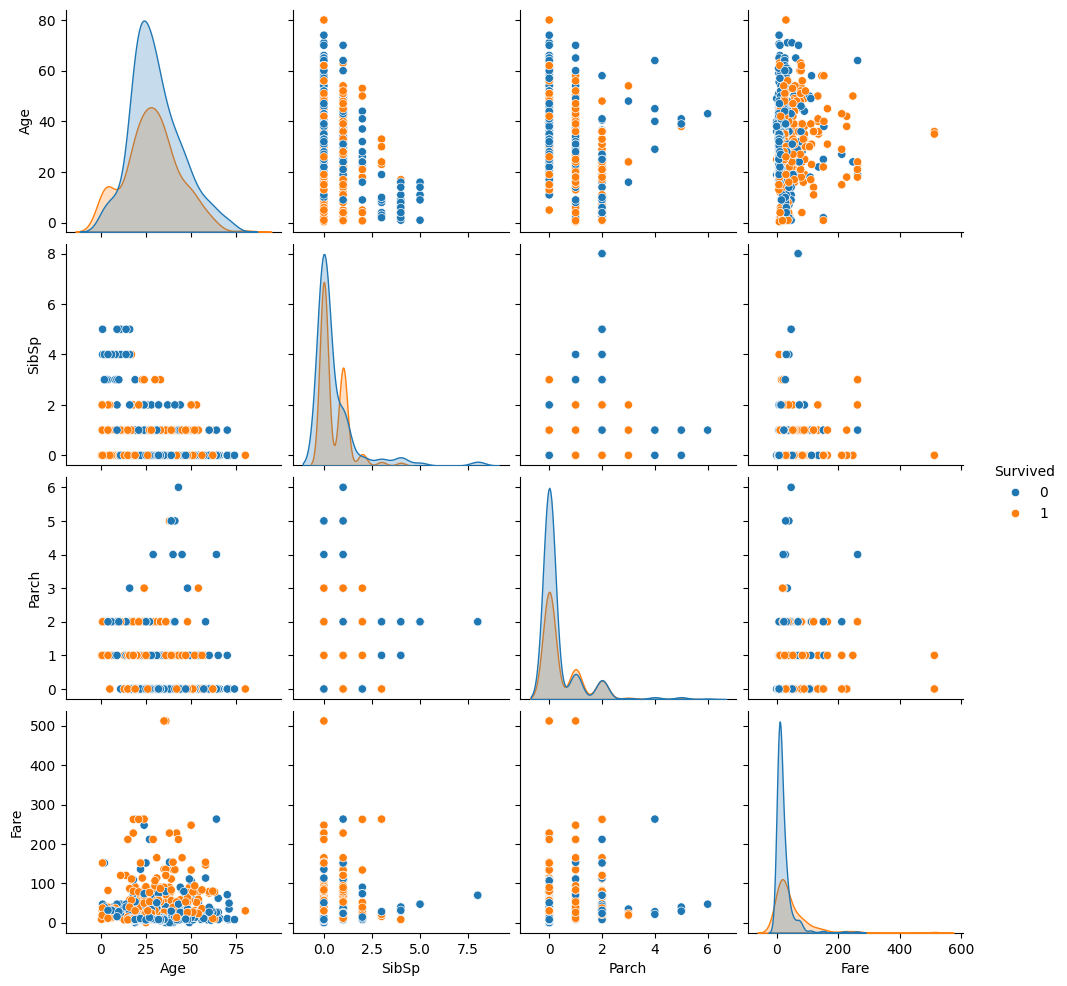

In [ ]:
sns.pairplot(data=df_train[['Age', 'SibSp', 'Parch', 'Fare','Survived']],hue='Survived')

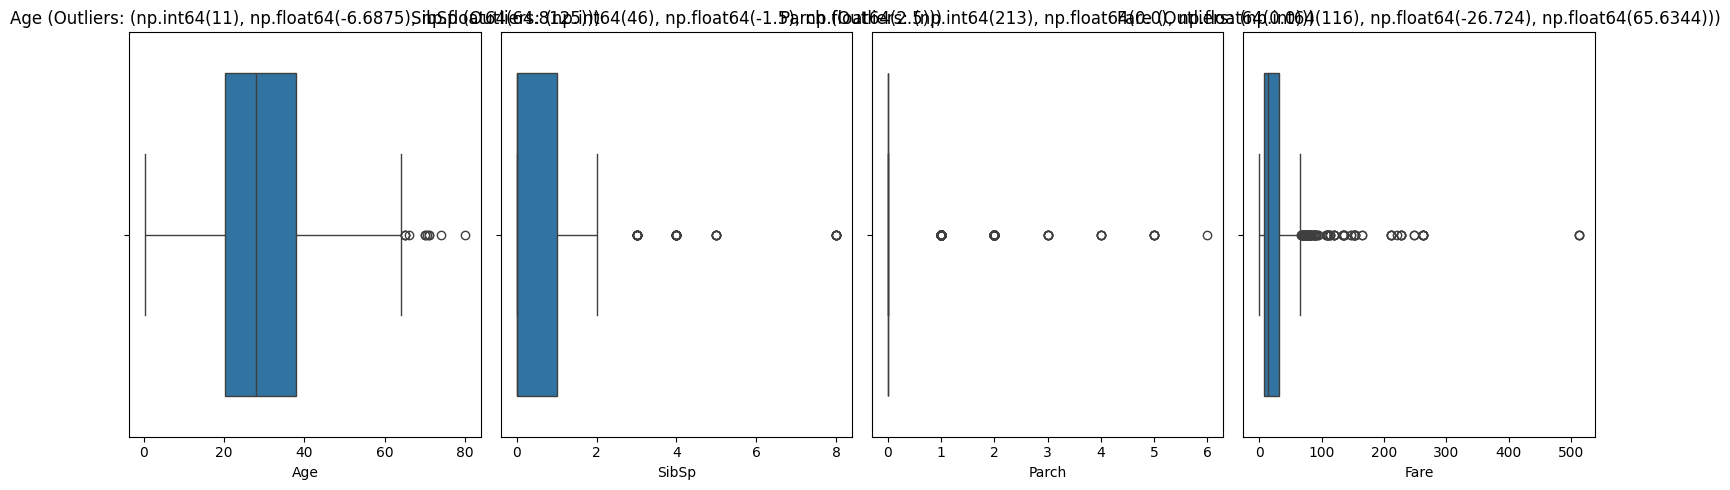

In [ ]:
plot_boxplots_with_outliers(df_train, columns_to_analyze)

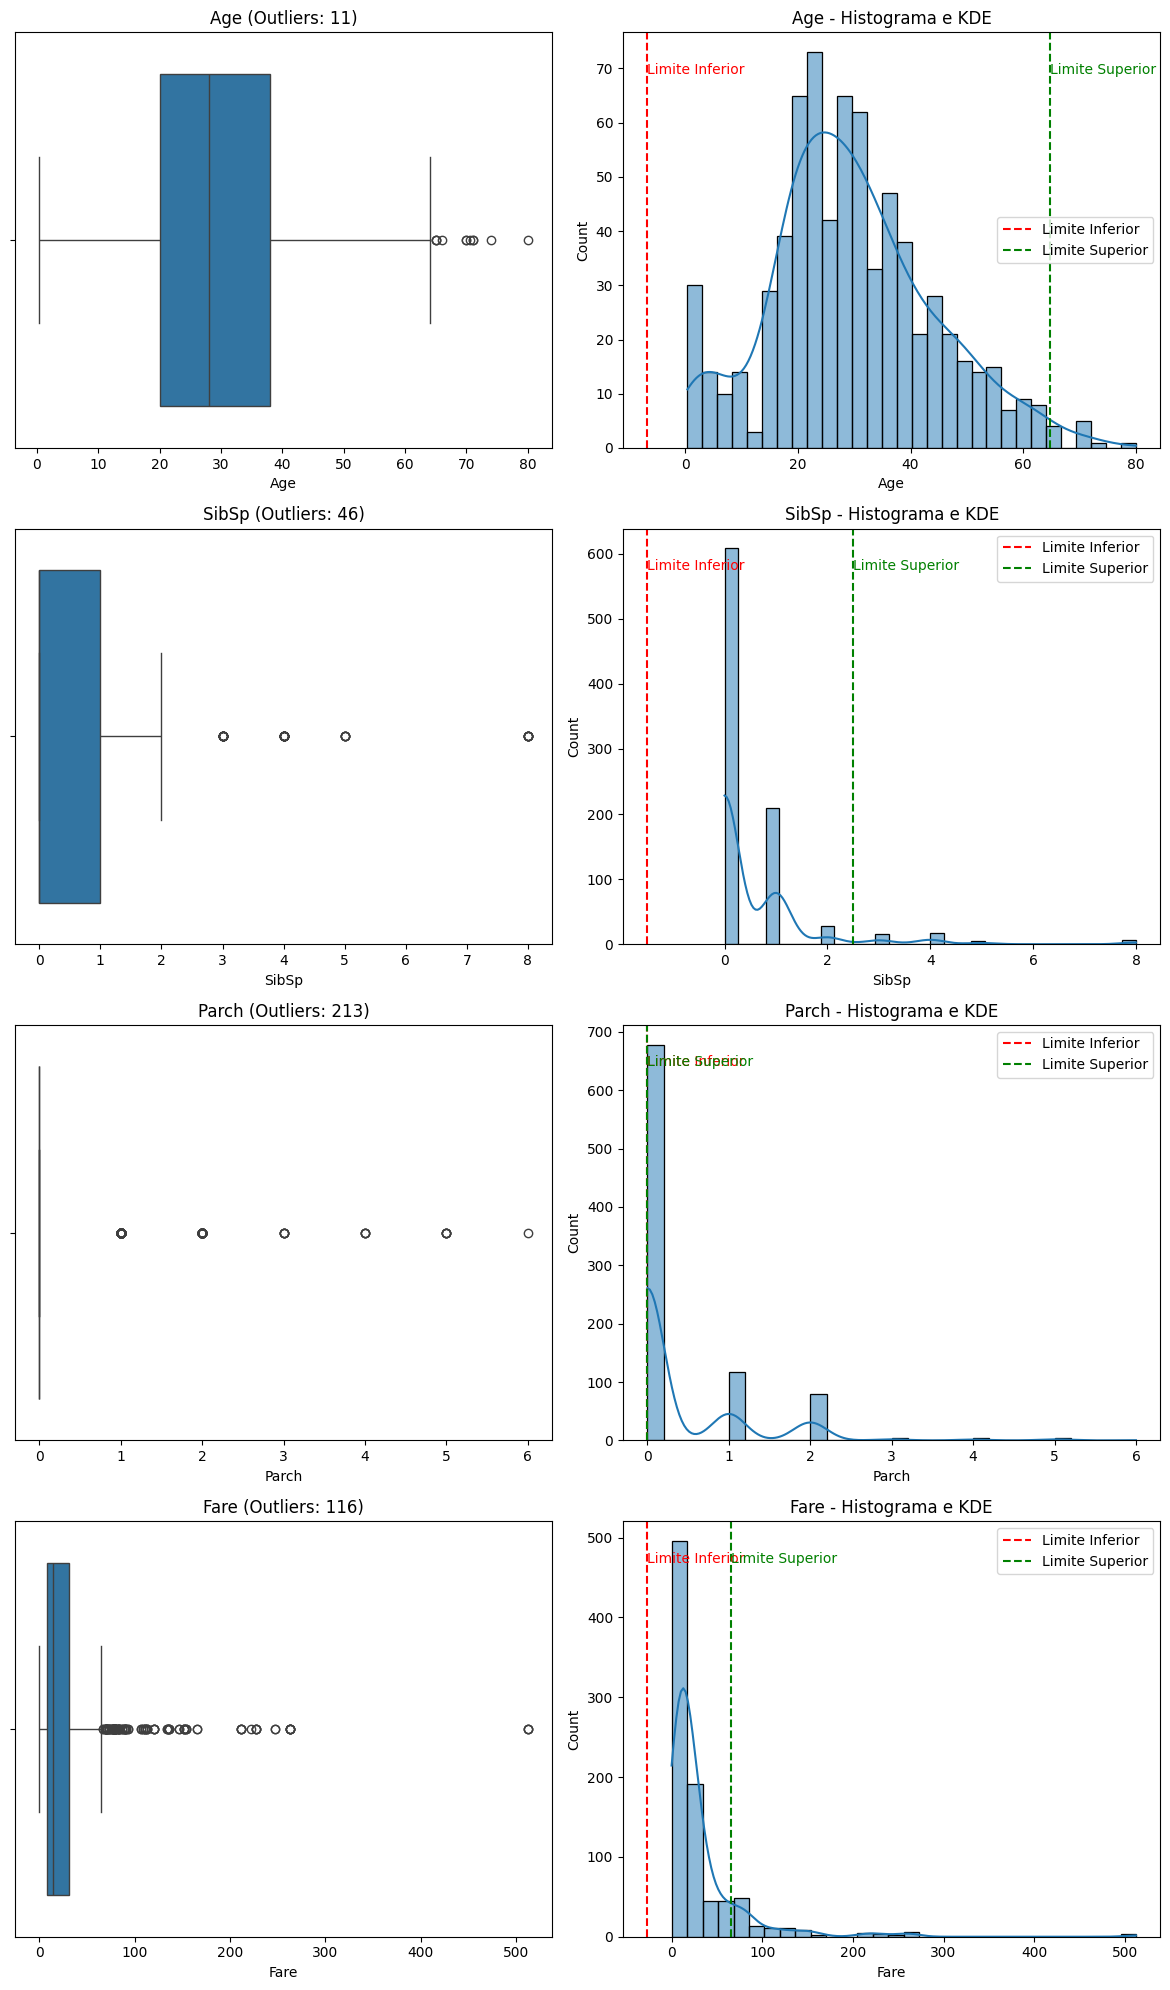

In [ ]:
plot_boxplots_hist_kde(df_train, columns_to_analyze)

### Data Analysis

- **Parch**:  
  - Indicates that it can be simplified into a categorical variable.  
  - Example categories:  
    - With children  
    - With one child  
    - Without children  

- **Fare**:  
  - Most values are concentrated around low amounts.  
  - It may represent the passenger's class.  
  - It is necessary to study how **Fare** relates to the variables **Pclass** and **Survived**.

- **SibSp**:  
  - There is a significant concentration of values at **0**.  
  - It could be transformed into a categorical variable.  
  - Example categories:  
    - Alone  
    - Small family  
    - Large family  

- **Age**:  
  - It has variations that could allow for categorization.  
  - Suggested categories:  
    - Child  
    - Teenager  
    - Adult  
    - Elderly  

##### Correlação

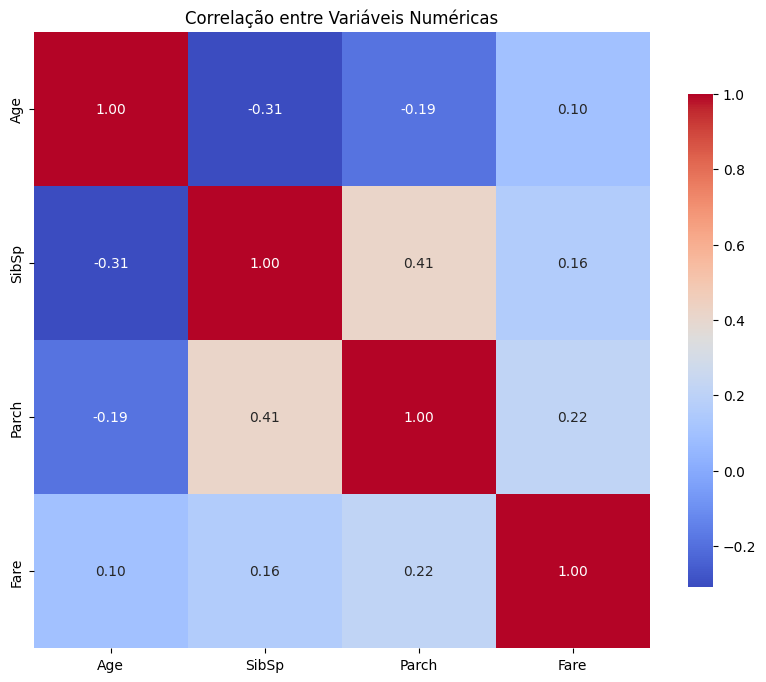

In [ ]:
plot_correlation_heatmap(df_train[['Age', 'SibSp', 'Parch','Fare']])


In [ ]:
results = correlation_analysis(df_train, 'SibSp', 'Parch')

for key, value in results.items():
    print(f"{key}: {value}")

Pearson Correlation: 0.4148376986201561
Pearson P-value: 2.2418236681408012e-38
Pearson Test: Rejeita a hipótese nula: as variáveis não são independentes.
Spearman Correlation: 0.4500139710086164
Spearman P-value: 1.2260016340713908e-45
Spearman Test: Rejeita a hipótese nula: as variáveis não são independentes.


In [ ]:
results = correlation_analysis(df_train[df_train['Age'].notna()], 'SibSp', 'Age')

for key, value in results.items():
    print(f"{key}: {value}")

Pearson Correlation: -0.3082467589236567
Pearson P-value: 3.5090251937842507e-17
Pearson Test: Rejeita a hipótese nula: as variáveis não são independentes.
Spearman Correlation: -0.1820612589179174
Spearman P-value: 9.717194149362118e-07
Spearman Test: Rejeita a hipótese nula: as variáveis não são independentes.


In [ ]:
results = correlation_analysis(df_train[df_train['Age'].notna()], 'Parch', 'Age')

for key, value in results.items():
    print(f"{key}: {value}")

Pearson Correlation: -0.18911926263203496
Pearson P-value: 3.569949388288717e-07
Pearson Test: Rejeita a hipótese nula: as variáveis não são independentes.
Spearman Correlation: -0.25421211743018024
Spearman P-value: 5.408556597051214e-12
Spearman Test: Rejeita a hipótese nula: as variáveis não são independentes.


As variáveis ['Age','SibSp','Parch'] apresentam dependência.

## 3. Preparação dos Dados (Data Preparation)
- **Seleção de Dados:** Escolher as colunas ou features que são relevantes para o problema, descartando as que não contribuem.
- **Limpeza de Dados:** Tratar valores ausentes, duplicados, ou inconsistentes de maneira adequada (ex.: preenchimento, exclusão ou imputação).
- **Transformação de Dados:** Realizar transformações nos dados, como codificação de variáveis categóricas (One-Hot Encoding), normalização ou padronização de variáveis numéricas.
- **Criação de Novas Features (Feature Engineering):** Criar novas variáveis ou transformar variáveis existentes para melhor representar o problema (ex.: combinação de variáveis, transformação de colunas temporais, categorias de idade).

### Seleção de Dados

In [ ]:
# - Name, PassengerId, Ticket and Cabin aren't important for causal effects and can be removed.
# Drop the columns from the DataFrame
df_train.drop(columns=['Name','Ticket','Cabin_l','Cabin_n','Cabin'], inplace=True)

### Limpeza de Dados

Os outliers não serão removidos

In [ ]:
# A moda é um valor representativo relacionado ao local de embarque. Como há apenas alguns dados ausentes, vamos preencher os valores nulos com a moda.

moda_embarked = df_train['Embarked'].mode()[0]
print(f'Moda: {moda_embarked}\n')
# Preencher os valores nulos com a moda
df_train['Embarked'] = df_train['Embarked'].fillna(moda_embarked)
df_train['Embarked'].isna().sum()

Moda: S



np.int64(0)

In [ ]:
# A mediana em relação a idade, pode ser representativo

mediana_idade = df_train['Age'].mean()
print(f'Mediana: {mediana_idade}\n')

# Preencher os valores nulos com a mediana
df_train['Age'] = df_train['Age'].fillna(mediana_idade)
df_train['Age'].isna().sum()

Mediana: 29.69911764705882



np.int64(0)

In [ ]:
def show_mode_and_median(df: pd.DataFrame):
    """
    Mostra a moda e a mediana de todas as colunas em um DataFrame.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados.
        
    Retorna:
        None: Exibe os resultados no console.
    """
    print("Resumo de Moda e Mediana por Coluna:\n")
    
    for column in df.columns:
        print(f"Coluna: {column}")
        
        # Moda
        mode = df[column].mode()
        if not mode.empty:
            print(f"  Moda: {', '.join(map(str, mode.tolist()))}")
        else:
            print("  Moda: Nenhuma (coluna vazia)")
        
        # Mediana (somente para colunas numéricas)
        if pd.api.types.is_numeric_dtype(df[column]):
            median = df[column].median()
            print(f"  Mediana: {median}")
        else:
            print("  Mediana: Não aplicável para colunas não numéricas")
        
        print("-" * 40)

In [ ]:
show_mode_and_median(df_train)

Resumo de Moda e Mediana por Coluna:

Coluna: PassengerId
  Moda: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 20

In [ ]:
# Remoção de dados duplicados para balancear o modelo
df_train.drop_duplicates(inplace=True)

### Transformação de Dados

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [ ]:
# Variaveis de entrada
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Age'] = df_train['Age'].astype(int)
df_train['SibSp'] = df_train['SibSp'].astype(int)
df_train['Parch'] = df_train['Parch'].astype(int)
df_train['Fare'] = df_train['Fare'].astype(float)

In [ ]:
# Variaveis de saída
df_train['PassengerId'] = df_train['PassengerId'].astype(str)
df_train['Survived'] = df_train['Survived'].astype('category')

### Feature Engineering

#### Transformando Idade em Categorias

- **Age**: 
  - Apresenta variações que podem permitir a categorização.
  - Sugestões de categorias:
    - Criança
    - Adolescente
    - Adulto
    - Meia idade
    - Idoso

In [ ]:
# Definindo os bins e as labels
bins = [-1, 12, 19, 39, 64, float('inf')]
labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto Meia Idade', 'Idoso']

# Categorizar a coluna 'Age'
df_train['Age Group'] = pd.cut(df_train['Age'], bins=bins, labels=labels)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group
0,1,0,3,male,22,1,0,7.2500,S,Adulto Jovem
1,2,1,1,female,38,1,0,71.2833,C,Adulto Jovem
2,3,1,3,female,26,0,0,7.9250,S,Adulto Jovem
3,4,1,1,female,35,1,0,53.1000,S,Adulto Jovem
4,5,0,3,male,35,0,0,8.0500,S,Adulto Jovem


#### Transformando SibSp em categorias


- **SibSp**: 
  - Há uma concentração significativa de valores em `0`.
  - Pode ser transformado em uma variável categórica.
  - Exemplos de categorias:
    - Sozinho
    - Família pequena
    - Família grande

In [ ]:
# Definindo os bins e as labels
bins = [-1, 0, 2, float('inf')]
labels = ['Sozinho', 'Família pequena', 'Família grande']

# Categorizar a coluna 'Age'
df_train['SibSp Group'] = pd.cut(df_train['SibSp'], bins=bins, labels=labels)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group,SibSp Group
0,1,0,3,male,22,1,0,7.2500,S,Adulto Jovem,Família pequena
1,2,1,1,female,38,1,0,71.2833,C,Adulto Jovem,Família pequena
2,3,1,3,female,26,0,0,7.9250,S,Adulto Jovem,Sozinho
3,4,1,1,female,35,1,0,53.1000,S,Adulto Jovem,Família pequena
4,5,0,3,male,35,0,0,8.0500,S,Adulto Jovem,Sozinho


#### Transformando Parch em categorias


- **Parch**: 
  - Indica que pode ser simplificado em uma variável categórica.
  - Exemplos de categorias: 
    - Com filhos 
    - Com um filho 
    - Sem filhos

In [ ]:
# Definindo os bins e as labels
bins = [-1, 0, 1, float('inf')]
labels = ['Sem filhos', 'Com um filho', 'Com filhos']

# Categorizar a coluna 'Age'
df_train['Parch Group'] = pd.cut(df_train['Parch'], bins=bins, labels=labels)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group,SibSp Group,Parch Group
0,1,0,3,male,22,1,0,7.2500,S,Adulto Jovem,Família pequena,Sem filhos
1,2,1,1,female,38,1,0,71.2833,C,Adulto Jovem,Família pequena,Sem filhos
2,3,1,3,female,26,0,0,7.9250,S,Adulto Jovem,Sozinho,Sem filhos
3,4,1,1,female,35,1,0,53.1000,S,Adulto Jovem,Família pequena,Sem filhos
4,5,0,3,male,35,0,0,8.0500,S,Adulto Jovem,Sozinho,Sem filhos


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
 9   Age Group    891 non-null    category
 10  SibSp Group  891 non-null    category
 11  Parch Group  891 non-null    category
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 42.0+ KB


In [ ]:
# Aplicar LabelEncoder em cada coluna categórica
categorical_columns = df_train.select_dtypes(include=['category']).columns.tolist()
categorical_columns

['Survived',
 'Pclass',
 'Sex',
 'Embarked',
 'Age Group',
 'SibSp Group',
 'Parch Group']

In [ ]:
# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column].astype(str))

NameError: name 'LabelEncoder' is not defined

## 4. Modelagem (Modeling)
- **Seleção de Algoritmo:** Escolher algoritmos de machine learning ou técnicas analíticas adequadas ao problema (ex.: regressão, classificação, árvore de decisão, redes neurais, clusterização).
- **Divisão dos Dados:** Separar o dataset em conjuntos de treino e teste para evitar overfitting e validar o modelo (`train_test_split`).
- **Treinamento do Modelo:** Treinar o modelo escolhido com os dados de treino (`model.fit()`).
- **Ajuste de Hiperparâmetros (se aplicável):** Ajustar parâmetros do modelo para melhorar o desempenho e a precisão, utilizando técnicas como busca em grade (Grid Search) ou otimização bayesiana.
- **Validação Cruzada (se aplicável):** Utilizar técnicas de validação cruzada para verificar a generalização do modelo em diferentes divisões do dataset.

### Avaliação (Evaluation)
- **Predições:** Fazer previsões com o modelo treinado usando os dados de teste (`model.predict()`).
- **Métricas de Desempenho:** Avaliar o modelo com métricas apropriadas ao problema (ex.: acurácia, precisão, recall, F1-score, ROC-AUC para classificação; erro médio quadrático, R² para regressão).
- **Análise das Métricas:** Analisar os resultados das métricas para determinar se o modelo atende aos requisitos de negócio. Verificar trade-offs, como precisão vs. recall, se aplicável.
- **Importância das Variáveis (se aplicável):** Identificar as variáveis que mais influenciam o modelo (ex.: `model.feature_importances_` para modelos baseados em árvores).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Exemplo: carregar o DataFrame (caso não tenha feito isso)
# df_train = pd.read_csv('seu_arquivo.csv')

# Exemplo: selecionar as colunas relevantes
X = df_train[['Pclass', 'Sex', 'Embarked', 'Age Group', 'SibSp Group', 'Parch Group']]  # Características (features)
y = df_train['Survived']  # Rótulo (target)

# Dividir os dados em conjuntos de treino e teste
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
model_tree.fit(X_train_tree, y_train_tree)

# Fazer previsões
y_pred_tree = model_tree.predict(X_test_tree)


# Calcular as métricas

# Acurácia
accuracy = accuracy_score(y_test_tree, y_pred_tree)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test_tree, y_pred_tree)

# Relatório de Classificação
class_report = classification_report(y_test_tree, y_pred_tree)

# ROC AUC (se aplicável para o seu modelo binário)
roc_auc = roc_auc_score(y_test_tree, model_tree.predict_proba(X_test_tree)[:, 1])

# Exibir as métricas
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Opcional: Plot da Curva ROC
RocCurveDisplay.from_estimator(model_tree, X_test_tree, y_test_tree)
plt.title('ROC Curve for Decision Tree')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Configuração de Validação Cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_tree, X, y, cv=cv, scoring='roc_auc')
# Resultados
print(f'Scores ROC AUC para cada fold: {cv_scores}')
print(f'Média do ROC AUC: {np.mean(cv_scores):.2f}')
print(f'Desvio Padrão do ROC AUC: {np.std(cv_scores):.2f}')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
)

# Define features and target
X = df_train[['Pclass', 'Sex', 'Embarked', 'Age Group', 'SibSp Group', 'Parch Group']]  # Características (features)
y = df_train['Survived']  # Rótulo (target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir pesos para as classes no Random Forest, penalizando mais os erros na classe minoritária
class_weights = {0: 1, 1: 1}  # Aumenta o peso da classe 1 (sobreviveu)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Optional: Plot ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve for Random Forest')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Configuração de Validação Cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
# Resultados
print(f'Scores ROC AUC para cada fold: {cv_scores}')
print(f'Média do ROC AUC: {np.mean(cv_scores):.2f}')
print(f'Desvio Padrão do ROC AUC: {np.std(cv_scores):.2f}')

## 6. Deploy

### Artefato de transformação

In [ ]:
def transform_data(df_to_predict: pd.DataFrame, fill_strategies: dict = None) -> pd.DataFrame:
    """
    Transforma os dados do DataFrame para preparação de modelo preditivo.
    
    - Remove colunas irrelevantes.
    - Converte os tipos de dados.
    - Categoriza variáveis numéricas em grupos.
    - Trata valores ausentes com base em estratégias definidas.
    - Codifica variáveis categóricas.
    
    Parâmetros:
        df_to_predict (pd.DataFrame): DataFrame contendo os dados a serem transformados.
        fill_strategies (dict): Dicionário com estratégias de preenchimento para colunas específicas.
        
    Retorna:
        pd.DataFrame: DataFrame transformado.
    """

    # Estratégias de preenchimento padrão (caso não sejam fornecidas)
    if fill_strategies is None:
        fill_strategies = {
            'Pclass': '3',
            'Embarked': 'S',
            'Sex': 'male',
            'Age': 29,
            'SibSp': 0,
            'Parch': 0,
            'Fare': 14.4542
        }

    # Verificar se as colunas esperadas estão no DataFrame
    expected_columns = {'Name', 'PassengerId', 'Ticket', 'Cabin',
                        'Pclass', 'Embarked', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'}
    missing_columns = expected_columns - set(df_to_predict.columns)
    if missing_columns:
        raise ValueError(f"Colunas ausentes no DataFrame: {missing_columns}")
    
    # Remover colunas irrelevantes
    columns_to_drop = ['Name', 'Ticket', 'Cabin']
    df_to_predict = df_to_predict.drop(columns=columns_to_drop)

    # Converter tipos das variáveis
    type_conversions = {
        'Pclass': 'category',
        'Embarked': 'category',
        'Sex': 'category',
        'Age': int,
        'SibSp': int,
        'Parch': int,
        'Fare': float,
        'PassengerId': str
    }

    # Tratar valores ausentes usando as estratégias definidas
    def fill_missing_values(df, strategies):
        for column, strategy in strategies.items():
            if column in df.columns:
                if strategy == 'median':
                    df[column] = df[column].fillna(df[column].median())
                elif strategy == 'mode':
                    df[column] = df[column].fillna(df[column].mode()[0])
                elif isinstance(strategy, (int, float, str)):
                    df[column] = df[column].fillna(strategy)
                else:
                    raise ValueError(f"Estratégia desconhecida para a coluna {column}: {strategy}")
        return df
    
    df_to_predict = fill_missing_values(df_to_predict, fill_strategies)

    for column, dtype in type_conversions.items():
        df_to_predict[column] = df_to_predict[column].astype(dtype)
    
    # Definir e aplicar bins e labels
    def categorize_column(df, column, bins, labels, new_column_name):
        df[new_column_name] = pd.cut(df[column], bins=bins, labels=labels)
        return df
    
    age_bins = [-1, 12, 19, 39, 64, float('inf')]
    age_labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto Meia Idade', 'Idoso']
    df_to_predict = categorize_column(df_to_predict, 'Age', age_bins, age_labels, 'Age Group')
    
    sibsp_bins = [-1, 0, 2, float('inf')]
    sibsp_labels = ['Sozinho', 'Família pequena', 'Família grande']
    df_to_predict = categorize_column(df_to_predict, 'SibSp', sibsp_bins, sibsp_labels, 'SibSp Group')
    
    parch_bins = [-1, 0, 1, float('inf')]
    parch_labels = ['Sem filhos', 'Com um filho', 'Com filhos']
    df_to_predict = categorize_column(df_to_predict, 'Parch', parch_bins, parch_labels, 'Parch Group')
    
    # Aplicar LabelEncoder às colunas categóricas
    def encode_categorical_columns(df, columns):
        label_encoder = LabelEncoder()
        for column in columns:
            df[column] = label_encoder.fit_transform(df[column].astype(str))
        return df
    
    categorical_columns = df_to_predict.select_dtypes(include=['category']).columns.tolist()
    df_to_predict = encode_categorical_columns(df_to_predict, categorical_columns)
    
    return df_to_predict


In [ ]:
X_test.info()

In [ ]:
df_test_model.info()

In [ ]:
# Make test prediction
df_to_predict = transform_data(df_test_model)
df_to_predict = df_to_predict[['Pclass', 'Sex', 'Embarked', 'Age Group', 'SibSp Group', 'Parch Group']]  # Características (features)
df_to_predict.info()

In [ ]:
# Make predictions
df_test_model['Survived'] = rf.predict(df_to_predict)


In [ ]:
df_test_model.head()

In [ ]:
df_test_model.describe()

In [ ]:
# Exportando apenas as colunas PassengerId e Survived para Excel
df_test_model[['PassengerId', 'Survived']].to_csv("df_test_model.csv", index=False)
print("Arquivo Excel salvo com sucesso!")
